# Overview of this jupyter notebook

1. Loading data
2. Creating test data
3. Creating validation data
4. Labeling test and validation data
5. Creating train data
6. Plotting train, test and validation data
5. Save feature and label

In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
import os
import json
import random
import pickle
import importlib
from library import etl_data as etl            # this module contains functions that load, visualize and save the data
from library import faps_color as fapsc        # this module contains the color combination of FAPS Institute
from library import classification_util as cu  # this module contains helper functions for the classification task
print(importlib.reload(etl))
print(importlib.reload(fapsc))
print(importlib.reload(cu))

<module 'library.etl_data' from 'C:\\Users\\songs\\OneDrive\\Desktop\\0. PA_FAPS\\04_Code\\library\\etl_data.py'>
<module 'library.faps_color' from 'C:\\Users\\songs\\OneDrive\\Desktop\\0. PA_FAPS\\04_Code\\library\\faps_color.py'>
<module 'library.classification_util' from 'C:\\Users\\songs\\OneDrive\\Desktop\\0. PA_FAPS\\04_Code\\library\\classification_util.py'>


## 1. Loading data

In [3]:
main_path = "..\\03_Schraubprozessdaten\\einzelne_klassen\\"
folders = os.listdir(main_path)
folders

['0_in_ordnung',
 '1_kleine_durchgangsbohrung_v2',
 '2_falsch_ausgerichtete_fuegepartner_v3',
 '3_unebene_fuegeflaeche',
 '4_verunreinigtes_gewinde',
 '5_verschmutzte_schraube',
 '6_fremdkoerper_am_gewindeende',
 '7_beschaedigte_schraube']

In [4]:
classes = ['0_in_ordnung',
           '1_kleine_durchgangsbohrung',
           '2_versetzte_fuegepartner',
           '3_unebene_fuegeflaeche',
           '4_span_im_gewinde',
           '5_verschmutzte_schraube',
           '6_fremdkoerper_am_gewindeende',
           '7_beschaedigte_schraube']

In [5]:
df0 = pd.read_pickle("dataframes/df0_v4.1.pkl")
df1ae = pd.read_pickle("dataframes/df1_autoencoder_v3.1.pkl")
df2ae = pd.read_pickle("dataframes/df2_autoencoder_v3.1.pkl")
df3ae = pd.read_pickle("dataframes/df3_autoencoder_v3.1.pkl")
df4ae = pd.read_pickle("dataframes/df4_autoencoder_v3.1.pkl")
df5ae = pd.read_pickle("dataframes/df5_autoencoder_v3.1.pkl")
df6ae = pd.read_pickle("dataframes/df6_autoencoder_v3.1.pkl")
df7ae = pd.read_pickle("dataframes/df7_autoencoder_v3.1.pkl")

In [6]:
print(df0.shape, df1ae.shape, df2ae.shape, df3ae.shape, df4ae.shape, df5ae.shape, df6ae.shape, df7ae.shape)

(775, 800) (931, 80) (812, 80) (697, 80) (803, 80) (766, 80) (743, 80) (748, 80)


In [7]:
df0 = df0.values.transpose()
df0.shape

(800, 775)

In [8]:
# splitting df0 into train and test data

train_data0, test_data0 = train_test_split(df0, random_state=1, train_size=600, shuffle=True)

print(train_data0.shape)
print(test_data0.shape)

(600, 775)
(200, 775)


In [9]:
# test data of df0 is splitted again in test and val data

test_data0, val_data0 = train_test_split(test_data0, random_state=1, test_size=100, shuffle=True)

print(test_data0.shape)
print(val_data0.shape)

(100, 775)
(100, 775)


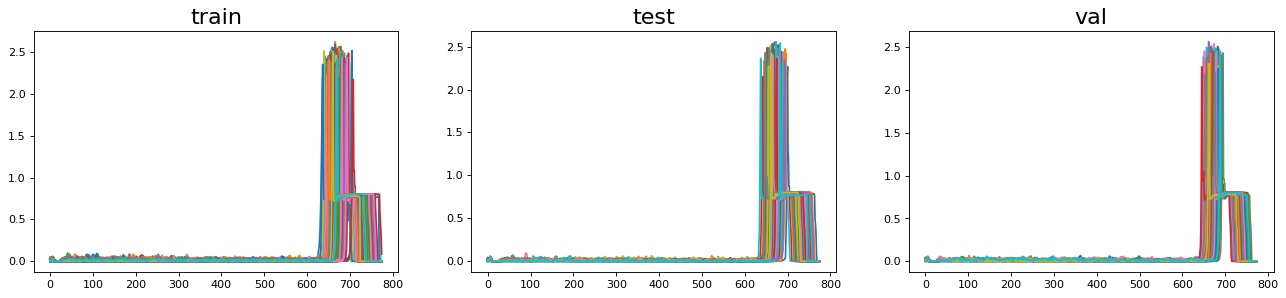

In [10]:
fig, axs = plt.subplots(1, 3, figsize=(20,4), dpi=80)
axs[0].plot(train_data0.transpose())
axs[1].plot(test_data0.transpose())
axs[2].plot(val_data0.transpose())

axs[0].set_title("train", fontsize=20)
axs[1].set_title("test", fontsize=20)
axs[2].set_title("val", fontsize=20)
fig.show()

In [11]:
df1ae_test = df1ae[df1ae.columns[:40]]
df2ae_test = df2ae[df2ae.columns[:40]]
df3ae_test = df3ae[df3ae.columns[:40]]
df4ae_test = df4ae[df4ae.columns[:40]]
df5ae_test = df5ae[df5ae.columns[:40]]
df6ae_test = df6ae[df6ae.columns[:40]]
df7ae_test = df7ae[df7ae.columns[:40]]

In [12]:
df1ae_val = df1ae[df1ae.columns[40:]]
df2ae_val = df2ae[df2ae.columns[40:]]
df3ae_val = df3ae[df3ae.columns[40:]]
df4ae_val = df4ae[df4ae.columns[40:]]
df5ae_val = df5ae[df5ae.columns[40:]]
df6ae_val = df6ae[df6ae.columns[40:]]
df7ae_val = df7ae[df7ae.columns[40:]]

## 2. Creating test data

In [13]:
# length of the curves is set to 920

len_curves = 920

In [14]:
test_data_df0 = pd.DataFrame(test_data0.transpose())
test_data_df0

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.01792,0.00448,0.00448,0.00448,0.01792,0.00000,0.00000,0.0,0.02240,0.00000,...,0.00000,0.02688,0.02240,0.02688,0.01792,0.00448,0.01344,0.00000,0.00896,0.00000
1,0.01792,0.00448,0.00448,0.00448,0.01792,0.00000,0.00000,0.0,0.02240,0.00000,...,0.00000,0.02688,0.02240,0.02688,0.01792,0.00448,0.01344,0.00000,0.00896,0.00000
2,0.00896,0.00896,0.00896,0.00000,0.01792,0.00448,0.00448,0.0,0.00896,0.00000,...,0.00000,0.01344,0.01792,0.00448,0.01792,0.00448,0.00448,0.00000,0.01344,0.00448
3,0.00000,0.00448,0.00896,0.00000,0.00000,0.00896,0.00000,0.0,0.00448,0.00000,...,0.00896,0.01344,0.00448,0.00000,0.00896,0.00896,0.00000,0.00448,0.00448,0.00000
4,0.00896,0.01344,0.01792,0.00000,0.01344,0.01344,0.00896,0.0,0.00896,0.00448,...,0.00896,0.01792,0.01792,0.00896,0.01792,0.00896,0.00448,0.00896,0.01344,0.00448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
771,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
772,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
773,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


In [15]:
test_data = pd.concat([test_data_df0, df1ae_test, df2ae_test, df3ae_test, df4ae_test, df5ae_test, df6ae_test, df7ae_test], axis=1)
test_data = test_data.fillna(0)
test_data = test_data.iloc[:len_curves]
test_data

,0,1,2,3,4,5,6,7,8,9,...,80,81,84,86,87,89,94,95,96,98
0,0.01792,0.00448,0.00448,0.00448,0.01792,0.00000,0.00000,0.0,0.02240,0.00000,...,0.01344,0.00896,0.02240,0.02240,0.01792,0.03136,0.00000,0.00000,0.01792,0.01792
1,0.01792,0.00448,0.00448,0.00448,0.01792,0.00000,0.00000,0.0,0.02240,0.00000,...,0.00896,0.00896,0.02240,0.01792,0.01792,0.03136,0.00000,0.00000,0.01792,0.01792
2,0.00896,0.00896,0.00896,0.00000,0.01792,0.00448,0.00448,0.0,0.00896,0.00000,...,0.00000,0.01344,0.00896,0.00448,0.01792,0.01344,0.00000,0.00448,0.00896,0.00896
3,0.00000,0.00448,0.00896,0.00000,0.00000,0.00896,0.00000,0.0,0.00448,0.00000,...,0.00000,0.00896,0.00000,0.00448,0.00448,0.00448,0.00896,0.00448,0.00448,0.00448
4,0.00896,0.01344,0.01792,0.00000,0.01344,0.01344,0.00896,0.0,0.00896,0.00448,...,0.00000,0.01792,0.00896,0.00448,0.01792,0.01344,0.01344,0.01344,0.00896,0.01344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
916,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
917,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
918,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


In [16]:
test_data = test_data.values.transpose()
test_data.shape

(380, 920)

In [17]:
test_data

array([[0.01792, 0.01792, 0.00896, ..., 0.     , 0.     , 0.     ],
       [0.00448, 0.00448, 0.00896, ..., 0.     , 0.     , 0.     ],
       [0.00448, 0.00448, 0.00896, ..., 0.     , 0.     , 0.     ],
       ...,
       [0.     , 0.     , 0.00448, ..., 0.     , 0.     , 0.     ],
       [0.01792, 0.01792, 0.00896, ..., 0.     , 0.     , 0.     ],
       [0.01792, 0.01792, 0.00896, ..., 0.     , 0.     , 0.     ]])

## 3. Creating validation data

In [18]:
val_data_df0 = pd.DataFrame(val_data0.transpose())
val_data_df0

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.00448,0.01792,0.02240,0.01344,0.00000,0.00448,0.02240,0.01344,0.02688,0.00000,...,0.01344,0.01344,0.01344,0.01344,0.02688,0.02688,0.01792,0.00000,0.01344,0.00000
1,0.00448,0.01792,0.01792,0.01344,0.00000,0.00448,0.02240,0.01344,0.02240,0.00000,...,0.01344,0.01344,0.01344,0.01344,0.02688,0.02688,0.01792,0.00000,0.01344,0.00000
2,0.00896,0.01344,0.00896,0.01344,0.00448,0.00896,0.01344,0.01344,0.01344,0.00000,...,0.01792,0.00896,0.00000,0.01792,0.00896,0.01792,0.01344,0.00448,0.01792,0.00448
3,0.01344,0.00896,0.00000,0.00896,0.00448,0.01344,0.00448,0.00448,0.00000,0.00448,...,0.00448,0.00896,0.00000,0.00448,0.00448,0.00896,0.00896,0.00896,0.01344,0.00896
4,0.01792,0.01792,0.00896,0.01792,0.01344,0.01792,0.01344,0.01792,0.01344,0.01344,...,0.01344,0.01344,0.00448,0.01792,0.00896,0.01792,0.01344,0.01344,0.01792,0.01344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
771,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
772,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
773,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


In [19]:
val_data = pd.concat([val_data_df0, df1ae_val, df2ae_val, df3ae_val, df4ae_val, df5ae_val, df6ae_val, df7ae_val], axis=1)
val_data = val_data.fillna(0)
val_data = val_data.iloc[:len_curves]
val_data

,0,1,2,3,4,5,6,7,8,9,...,169,175,176,179,181,187,189,192,197,199
0,0.00448,0.01792,0.02240,0.01344,0.00000,0.00448,0.02240,0.01344,0.02688,0.00000,...,0.01792,0.04032,0.00448,0.03136,0.01792,0.00000,0.02240,0.01792,0.01792,0.01792
1,0.00448,0.01792,0.01792,0.01344,0.00000,0.00448,0.02240,0.01344,0.02240,0.00000,...,0.01792,0.03584,0.00448,0.03136,0.01792,0.00000,0.02240,0.01792,0.01792,0.01792
2,0.00896,0.01344,0.00896,0.01344,0.00448,0.00896,0.01344,0.01344,0.01344,0.00000,...,0.01344,0.01344,0.00000,0.02240,0.01344,0.00896,0.00896,0.00896,0.01792,0.01792
3,0.01344,0.00896,0.00000,0.00896,0.00448,0.01344,0.00448,0.00448,0.00000,0.00448,...,0.00448,0.00448,0.00000,0.00896,0.00448,0.00896,0.00448,0.00448,0.01344,0.00896
4,0.01792,0.01792,0.00896,0.01792,0.01344,0.01792,0.01344,0.01792,0.01344,0.01344,...,0.01344,0.00896,0.00000,0.02240,0.01344,0.01344,0.01344,0.00896,0.01792,0.01792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
916,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
917,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
918,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


In [20]:
val_data = val_data.values.transpose()
val_data.shape

(380, 920)

In [21]:
val_data

array([[0.00448, 0.00448, 0.00896, ..., 0.     , 0.     , 0.     ],
       [0.01792, 0.01792, 0.01344, ..., 0.     , 0.     , 0.     ],
       [0.0224 , 0.01792, 0.00896, ..., 0.     , 0.     , 0.     ],
       ...,
       [0.01792, 0.01792, 0.00896, ..., 0.     , 0.     , 0.     ],
       [0.01792, 0.01792, 0.01792, ..., 0.     , 0.     , 0.     ],
       [0.01792, 0.01792, 0.01792, ..., 0.     , 0.     , 0.     ]])

## 4. Labeling test and validation data

In [22]:
def label_data(class_sector, classes):

    label = []

    for i in range(len(classes)):  # 8 classes
        if i == 0:
            for j in range(class_sector[0], class_sector[1]):
                label.append(i)
        elif i == 1:
            for j in range(class_sector[1], class_sector[2]):
                label.append(i)
        elif i == 2:
            for j in range(class_sector[2], class_sector[3]):
                label.append(i)
        elif i == 3:
            for j in range(class_sector[3], class_sector[4]):
                label.append(i)
        elif i == 4:
            for j in range(class_sector[4], class_sector[5]):
                label.append(i)
        elif i == 5:
            for j in range(class_sector[5], class_sector[6]):
                label.append(i)
        elif i == 6:
            for j in range(class_sector[6], class_sector[7]):
                label.append(i)
        elif i == 7:
            for j in range(class_sector[7], class_sector[8]):
                label.append(i)
                
    print([label.count(x) for x in range(len(classes))])
    
    for i in range(len(classes)):
        print(label[class_sector[i]:class_sector[i+1]])
    
    return label

In [23]:
class_sector = [0, 100, 140, 180, 220, 260, 300, 340, 380]

In [24]:
label_test = label_data(class_sector, classes)

[100, 40, 40, 40, 40, 40, 40, 40]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,

In [25]:
label_val = label_data(class_sector, classes)

[100, 40, 40, 40, 40, 40, 40, 40]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,

# 5. Creating train data

In [26]:
train_data0.shape

(600, 775)

In [27]:
# train data needs to be padded with zeros to get the same lenth as the test data

train_data = np.zeros(train_data0.shape[0]*len_curves).reshape(train_data0.shape[0], len_curves)
train_data.shape

(600, 920)

In [28]:
train_data[:train_data0.shape[0], :train_data0.shape[1]] = train_data0
train_data

array([[0.01344, 0.01344, 0.00448, ..., 0.     , 0.     , 0.     ],
       [0.0224 , 0.0224 , 0.0224 , ..., 0.     , 0.     , 0.     ],
       [0.0448 , 0.03584, 0.01344, ..., 0.     , 0.     , 0.     ],
       ...,
       [0.0224 , 0.0224 , 0.01792, ..., 0.     , 0.     , 0.     ],
       [0.00448, 0.00448, 0.     , ..., 0.     , 0.     , 0.     ],
       [0.01344, 0.01344, 0.00448, ..., 0.     , 0.     , 0.     ]])

In [29]:
train_data.shape

(600, 920)

## 6. Plotting train, test and validation data

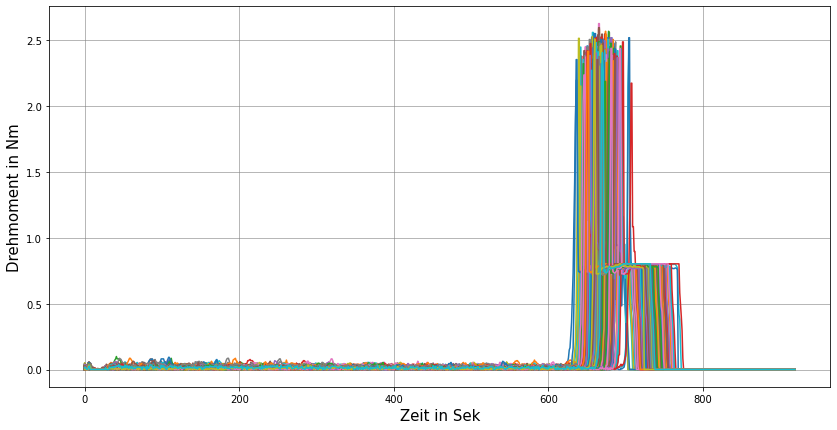

In [30]:
plt.figure(figsize=(14, 7))
plt.plot(train_data.transpose())
plt.xlabel('Zeit in Sek', fontsize=15)
plt.ylabel('Drehmoment in Nm', fontsize=15)
plt.grid(True, linestyle='-', color='grey', alpha=0.7)
plt.show()

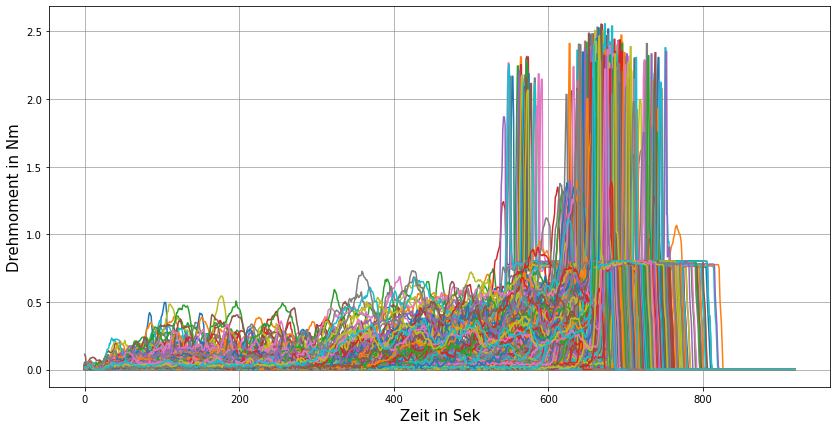

In [31]:
plt.figure(figsize=(14, 7))
plt.plot(test_data.transpose())
plt.xlabel('Zeit in Sek', fontsize=15)
plt.ylabel('Drehmoment in Nm', fontsize=15)
plt.grid(True, linestyle='-', color='grey', alpha=0.7)
plt.show()

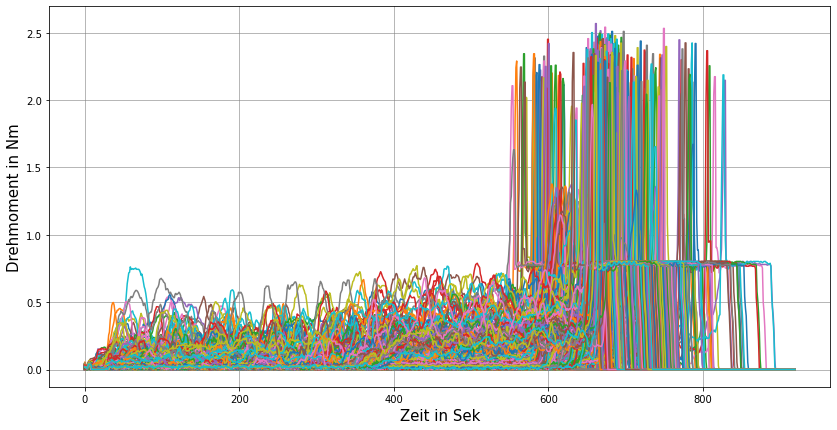

In [32]:
plt.figure(figsize=(14, 7))
plt.plot(val_data.transpose())
plt.xlabel('Zeit in Sek', fontsize=15)
plt.ylabel('Drehmoment in Nm', fontsize=15)
plt.grid(True, linestyle='-', color='grey', alpha=0.7)
plt.show()

## 7. Save feature and label

In [33]:
np.save('feature_label/train_data_autoencoder_v3.1.npy', train_data)

In [34]:
np.save("feature_label/test_data_autoencoder_v3.1.npy", test_data)

In [35]:
np.save("feature_label/test_data_label_autoencoder_v3.1.npy", label_test)

In [36]:
np.save("feature_label/val_data_autoencoder_v3.1.npy", val_data)

In [37]:
np.save("feature_label/val_data_label_autoencoder_v3.1.npy", label_val)